# K-Nearest Neighbors

### Objectives
After completing this ab you will be able to:
* Use K--Nearest neighbors to classify data
In this Lab you will load a customer dataset, fit the data, and use K-Nearest Neighbors to predict a data point. **But what is K-Nearest Neighbors?**

**K-Nearest Neighbors** is an algorithm for surpervised learning. Where the data is "trained" with data points corresponing to their classificdation. Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

#### Here's a visualization of the K-Nearest Neighbors algorithm
<br>

<p align=center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png" width=50%>

<br>

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a K value of 3 (3 nearest data points) we will obtain a prediction of Class B. Yet if we consider a K value of 6, we will obtgain a prediction of Class A.

In this sense, it is important to consider the value of K. But hopefully, from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.

Let's load required libraries

In [1]:
!pip install scikit-learn==0.23.1

     |████████████████████████████████| 6.8MB 29.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

## About the Dataset

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 

1- Basic Service 

2- E-Service 

3- Plus Service 

4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

Lets download the dataset.



In [4]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2021-05-27 09:25:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... failed: Name or service not known.
wget: unable to resolve host address ‘cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud’


In [7]:
# Loading data from CSV File
df = pd.read_csv('/content/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Data Visualization and Analysis

**Let's see how many of each class is in our dataset

In [9]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

**281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers**

You can easily explore your data using visualization techniques:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01fb7f5c10>]],
      dtype=object)

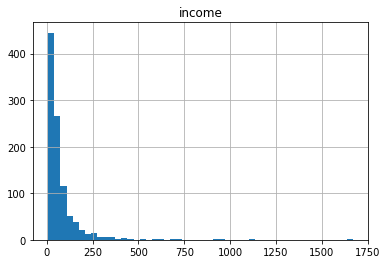

In [10]:
df.hist(column='income', bins=50)

### Feature set

Let's define feature sets, X:

In [11]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data fram to a Numpy Array:

In [13]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income','ed','employ','gender','reside']].values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   4.]])

In [16]:
# What are our labels?
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

## Normalize Data
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [14]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803,  0.96655883, -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981,  0.96655883, -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -1.03459817,  1.16300577]])

### Train Test Split
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (800, 10) (800,)
Test set: (200, 10) (200,)


## Classification

### K-Nearest Neighbor (KNN)

#### Import library
Classifier implementing the KNN vote

In [18]:
from sklearn.neighbors import KNeighborsClassifier

### Training
Let's start the algorithm with k=4 for now:

In [19]:
k = 4
# Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicting
We can use the model to predict the test set:

In [20]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

### Accuracy Evaluation
In multilabel classification, **accuracy classification score** is a funcion that computes subset accuracy. This funcion is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [24]:
from sklearn import metrics
print("Train set Accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat))

Train set Accuracy: 0.5475
Test set Accuracy: 0.3


### Practice
Can you build the model again, but this time with k=6?

In [25]:
k = 6
neigh2 = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
yhat2  = neigh2.predict(X_test)
print("Train set Accuracy:", metrics.accuracy_score(y_train,neigh2.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat2))

Train set Accuracy: 0.515
Test set Accuracy: 0.3


**What about other K?**

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

In [26]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):

    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.305, 0.295, 0.325, 0.3  , 0.31 , 0.3  , 0.325, 0.31 , 0.345])

### **Plot model accuracy for Different number of Neighbors**

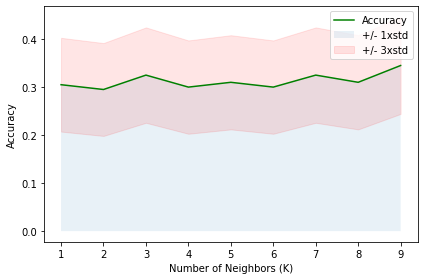

In [29]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color='red')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [30]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.345 with k= 9
